In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
import nltk
from sklearn import feature_extraction
from sklearn import feature_selection
from sklearn import metrics
from sklearn import model_selection
from sklearn import naive_bayes, neighbors, svm, tree
from sklearn.neighbors import classification, KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, auc, confusion_matrix,classification_report,f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate,KFold,train_test_split
from sklearn.svm import LinearSVC, SVC



In [2]:
from wordcloud import WordCloud

In [3]:
data= pd.read_csv(r'C:\Users\payal2.bhatia\Downloads\train_F3WbcTw.csv')

In [4]:
data1= pd.read_csv(r'C:\Users\payal2.bhatia\Downloads\train_F3WbcTw.csv')

In [5]:
data.head(2)

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,"Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think abo...",gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,"I can completely understand why you’d want to try it. But, results reported in lectures don’t al...",gilenya,2


In [6]:
data.shape

(5279, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5279 entries, 0 to 5278
Data columns (total 4 columns):
unique_hash    5279 non-null object
text           5279 non-null object
drug           5279 non-null object
sentiment      5279 non-null int64
dtypes: int64(1), object(3)
memory usage: 165.0+ KB


no na values

In [8]:
data.dtypes

unique_hash    object
text           object
drug           object
sentiment       int64
dtype: object

In [9]:
data.sentiment.value_counts()

2    3825
1     837
0     617
Name: sentiment, dtype: int64

sentiment	(Target) 0-positive, 1-negative, 2-neutral

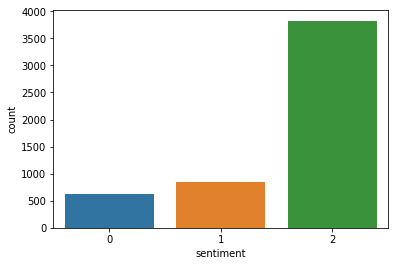

In [10]:
sns.countplot(data.sentiment)

#### Distribution of sentiments across drugs

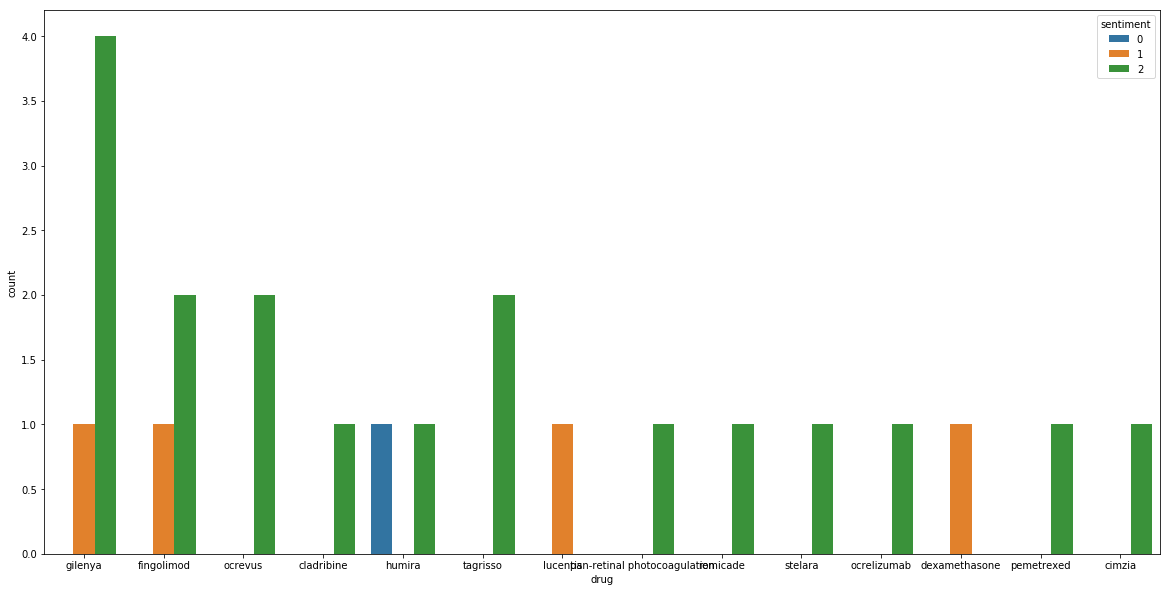

In [11]:
# a4_dims = (15, 5)
# fig, ax = plt.subplots(figsize=a4_dims)
plt.figure(figsize=(20, 10))
sns.countplot(data["drug"][0:23], orient="v", hue=data.sentiment)

<Figure size 2160x360 with 0 Axes>

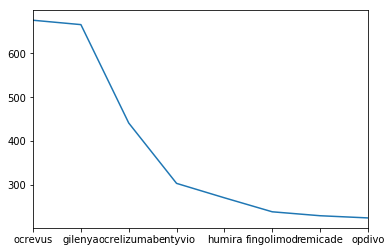

<Figure size 2160x360 with 0 Axes>

In [12]:
data["drug"].value_counts().sort_values(ascending=False)[0:8].plot()
plt.figure(figsize=(30, 5))


###### find the drug in which negative sentiment is high 

In [13]:
data[data.sentiment==1]["drug"].value_counts().sort_values(ascending=False)[:20]

gilenya        236
ocrevus        109
ocrelizumab     56
fingolimod      52
remicade        45
humira          40
entyvio         39
tarceva         35
opdivo          29
keytruda        27
alimta          19
tagrisso        17
cladribine      16
stelara         14
lucentis        11
tysabri          9
avastin          8
eylea            7
nivolumab        7
crizotinib       4
Name: drug, dtype: int64

In [14]:
data[data.sentiment==0]["drug"].value_counts().sort_values(ascending=False)[:20]

ocrevus        112
ocrelizumab     86
gilenya         77
opdivo          33
cladribine      28
stelara         22
keytruda        22
tarceva         17
humira          17
remicade        15
entyvio         15
fingolimod      15
tagrisso        13
alectinib       11
lucentis        11
alimta          11
tecentriq       10
eylea            9
xalkori          8
tofacitinib      7
Name: drug, dtype: int64

Statistical Count Features from headline text¶

Word Count - Total number of words in the headline

Character Count - Total number of characters in the headline excluding spaces

Word Density - Average length of the words used in the headline

Punctuation Count - Total number of punctuations used in the headline

Upper-Case to Lower-Case Words ratio - ratio of upper case words used and lower case words used in the text

In [15]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

(-0.5, 399.5, 199.5, -0.5)

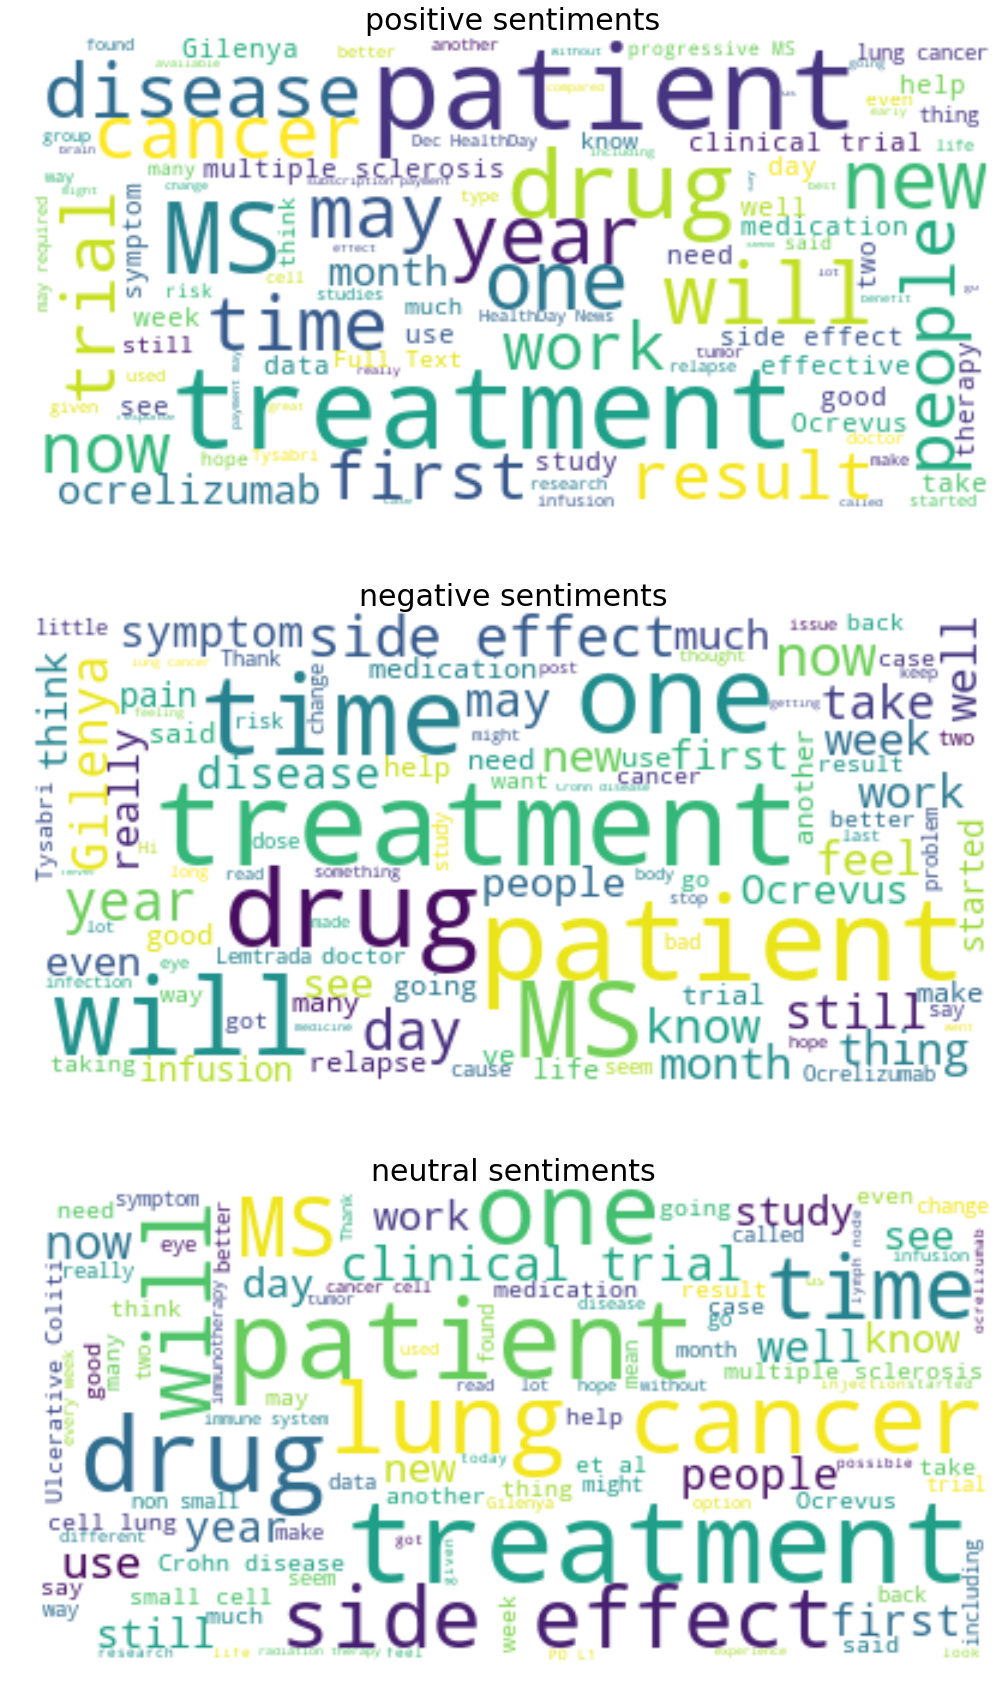

In [16]:
# Start with one review:
df_pos = data[data['sentiment']==0]["text"]
df_neg = data[data['sentiment']==1]["text"]
df_neut= data[data['sentiment']==2]["text"]
sentiment_all = " ".join(i for i in data.text)
sentiment_pos = " ".join(i for i in df_pos)
sentiment_neg = " ".join(i for i in df_neg)
sentiment_neut = " ".join(i for i in df_neut)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_All = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(sentiment_all)
wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(sentiment_pos)
wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(sentiment_neg)
wordcloud_neut = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(sentiment_neut)

# Display the generated image:
ax[0].imshow(wordcloud_All, interpolation='bilinear')
ax[0].set_title('All sentiments', fontsize=30)
ax[0].axis('off')
ax[0].imshow(wordcloud_pos, interpolation='bilinear')
ax[0].set_title('positive sentiments', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_neg, interpolation='bilinear')
ax[1].set_title('negative sentiments',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_neut, interpolation='bilinear')
ax[2].set_title('neutral sentiments',fontsize=30)
ax[2].axis('off')

### Generate Statistical Count Features

In [17]:
data["word_count"]=data["text"].apply(lambda x: len(x.split()))

In [18]:
highest_word_count=pd.DataFrame(data["word_count"].sort_values(ascending=False)[:10])
highest_word_count.index

Int64Index([1657, 3359, 5092, 2031, 1457, 3502, 3680, 3906, 1374, 2663], dtype='int64')

In [19]:
###### sentiment and drug across these highest word counts

In [20]:
for i in highest_word_count.index:
    print(i)
    print(data.loc[i][2], data.loc[i][3])

1657
stelara 2
3359
macugen 2
5092
laser photocoagulation 2
2031
entrectinib 2
1457
ipilimumab 2
3502
ocrevus 2
3680
entrectinib 2
3906
alectinib 2
1374
necitumumab 2
2663
erlotinib 2


In [21]:
data["char_count"]=data["text"].apply(lambda x: len(x.replace(" ", "")))

In [22]:
data.char_count.sort_values(ascending=False)[:6]

1657    108059
2031     74033
1457     62299
3359     57874
5092     57874
3502     55104
Name: char_count, dtype: int64

In [23]:
data["word_density"]= data["word_count"]/data["char_count"]

In [24]:
data["word_density"].sort_values(ascending=False)[:6]

61      0.333333
1222    0.315789
1880    0.311111
4530    0.304348
372     0.297872
1521    0.293506
Name: word_density, dtype: float64

###### Word Count Distribution

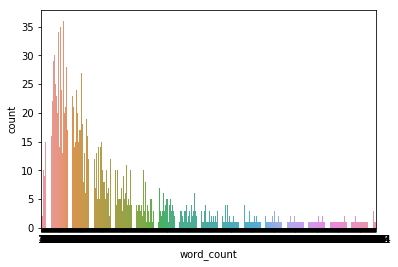

In [25]:
sns.countplot(data["word_count"])

Infrence: 
    
    users have write elaborately about few drugs only with neutral sentiments.
    
            stelara

            macugen 

            laser photocoagulation 

            entrectinib 

            ipilimumab 

C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


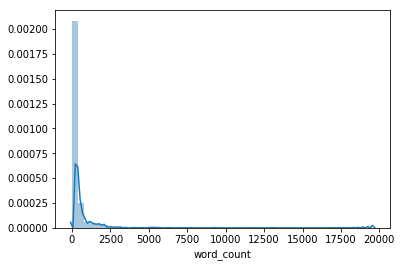

In [26]:
sns.distplot(data["word_count"])

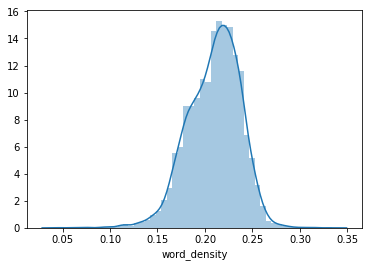

In [27]:
sns.distplot(data["word_density"])

Infrence: Almost a normal distribution 

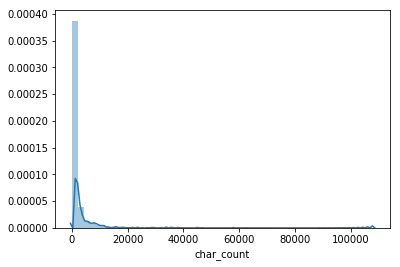

In [205]:
sns.distplot(data["char_count"])

In [206]:
data.head(2)

,unique_hash,text,drug,sentiment,word_count,char_count,word_density
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,"Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think abo...",gilenya,2,76,329,0.231003
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,"I can completely understand why you’d want to try it. But, results reported in lectures don’t al...",gilenya,2,206,979,0.210419


In [ ]:
Pre-processing text data

Most of the text data are cleaned by following below steps.

        Remove punctuations
    
        Tokenization - Converting a sentence into list of words
        
        Remove stopwords
        
        Lammetization/stemming - Tranforming any form of a word to its root word

In [28]:
import nltk 
from textblob import TextBlob
import re

In [330]:
data["text"]=data1.text

###### lowercase

In [29]:
data["text"]=data["text"].apply(lambda x: x.lower())

In [30]:
data["text"][0]

'autoimmune diseases tend to come in clusters. as for gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. i’m taking tysabri and feel amazing, no symptoms (other than dodgy color vision, but i’ve had it since always, so, don’t know) and i don’t know if it will last a month, a year, a decade, ive just decided to enjoy the ride, no point in worrying.'

###### Remove numbers

In [31]:
import re

In [32]:
data["text"]=data["text"].apply(lambda x: re.sub(r"\d+", "", x))

In [335]:
data["text"]=data["text"].apply(lambda x: re.sub(r'[^\w\s]',"", x))

In [37]:
from nltk.tokenize import TreebankWordTokenizer,wordpunct_tokenize
from nltk.corpus import stopwords

###### Sentencce tokenizer

In [34]:
# from nltk.tokenize import sent_tokenize
# data["text"]=data["text"].apply(lambda x: sent_tokenize(x)) noot needed

In [35]:
from nltk.tokenize import word_tokenize
data["tokenized_text"]=data["text"].apply(lambda x: word_tokenize(x))

In [38]:
stop=set(stopwords.words("english"))

In [39]:
data["tokenized_text"]=data["tokenized_text"].apply(lambda x: [word for word in x if word not in stop])

In [345]:
data["tokenized_text"][0:2]

0    [autoimmune, diseases, tend, come, clusters, gilenya, feel, good, dont, think, wont, change, any...
1    [completely, understand, youd, want, try, results, reported, lectures, dont, always, stand, scru...
Name: tokenized_text, dtype: object

###### Remove sparse terms and particular words

In [40]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
data["tokenized_text"]=data["tokenized_text"].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x]))

In [41]:
data["tokenized_text"][0:2]

0    autoimmune disease tend come cluster . gilenya – feel good , ’ think , ’ change anything waste t...
1    completely understand ’ want try . , result reported lecture ’ always stand scrutiny peer-review...
Name: tokenized_text, dtype: object

In [42]:
# data["text"]=data1.text

In [45]:
data.head(2)

,unique_hash,text,drug,sentiment,word_count,char_count,word_density,tokenized_text
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,"Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think abo...",gilenya,2,76,329,0.231003,"autoimmune disease tend come cluster . gilenya – feel good , ’ think , ’ change anything waste t..."
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,"I can completely understand why you’d want to try it. But, results reported in lectures don’t al...",gilenya,2,206,979,0.210419,"completely understand ’ want try . , result reported lecture ’ always stand scrutiny peer-review..."


#### Top Unigrams, Bigrams, Trigrams

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
CV=CountVectorizer()

In [47]:
def get_top_n_words(corpus, n=None):
    vec=CV.fit(corpus) # give vector to every word
    bag_of_words=vec.transform(corpus) #5279x41015 sparse matrix
    sum_of_words=bag_of_words.sum(axis=0) # total of every word vector or count
    words_freq=[(word, sum_of_words[0,idx]) for word, idx in vec.vocabulary_.items()]# sum_of_words[0,idx]--as data[row, column]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(data['tokenized_text'], 20)

In [48]:
common_words

[('patient', 9345),
 ('cancer', 8713),
 ('treatment', 7977),
 ('drug', 5514),
 ('may', 5481),
 ('year', 5084),
 ('disease', 5026),
 ('cell', 4730),
 ('trial', 4018),
 ('also', 3880),
 ('therapy', 3875),
 ('one', 3849),
 ('study', 3727),
 ('month', 3599),
 ('week', 3596),
 ('time', 3454),
 ('effect', 3379),
 ('lung', 3362),
 ('new', 3352),
 ('get', 2986)]

In [49]:
def get_top_n_bigram(corpus, n=None):
    vec=CountVectorizer(ngram_range=(2,2)).fit(corpus) # give vector to every word
    bag_of_words = vec.transform(corpus) #5279x41015 sparse matrix
    sum_of_words=bag_of_words.sum(axis=0) # total of every word vector or count
    words_freq=[(word, sum_of_words[0,idx]) for word, idx in vec.vocabulary_.items()]# sum_of_words[0,idx]--as data[row, column]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

bigrams = get_top_n_bigram(data['tokenized_text'], 20)

In [50]:
bigrams

[('lung cancer', 2283),
 ('side effect', 2059),
 ('clinical trial', 1680),
 ('multiple sclerosis', 1230),
 ('crohn disease', 1079),
 ('small cell', 875),
 ('cell lung', 842),
 ('ulcerative colitis', 781),
 ('et al', 702),
 ('non small', 690),
 ('immune system', 649),
 ('cancer cell', 557),
 ('http www', 547),
 ('every week', 540),
 ('lymph node', 522),
 ('radiation therapy', 440),
 ('long term', 438),
 ('year ago', 432),
 ('mg kg', 429),
 ('first line', 415)]

In [51]:
def get_top_n_trigram(corpus, n=None):
    vec=CountVectorizer(ngram_range=(3,3)).fit(corpus) # give vector to every word
    bag_of_words = vec.transform(corpus) #5279x41015 sparse matrix
    sum_of_words=bag_of_words.sum(axis=0) # total of every word vector or count
    words_freq=[(word, sum_of_words[0,idx]) for word, idx in vec.vocabulary_.items()]# sum_of_words[0,idx]--as data[row, column]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

trigrams = get_top_n_trigram(data['tokenized_text'], 20)

In [52]:
trigrams

[('small cell lung', 826),
 ('cell lung cancer', 818),
 ('non small cell', 686),
 ('disease modifying therapy', 193),
 ('open new window', 192),
 ('first line treatment', 185),
 ('progression free survival', 183),
 ('white blood cell', 182),
 ('lung cancer nsclc', 155),
 ('doctor right away', 154),
 ('new window click', 154),
 ('food drug administration', 146),
 ('may enhance adverse', 140),
 ('enhance adverse toxic', 139),
 ('adverse toxic effect', 139),
 ('dec healthday news', 138),
 ('side effect may', 136),
 ('stage iv nsclc', 135),
 ('crohn disease ulcerative', 132),
 ('disease ulcerative colitis', 132)]

Infrence:  from unigrams -- 

                    cancer treatment may take a year , there is some new study
                    
           from bigrams--
           
                    symptons and other disease around lung cancer
                    
           from trigrams--
           
                      same
                   

###### POS TAgging

In [62]:
blob = TextBlob(str(data['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df

NN      174
NNP     129
IN      111
JJ       99
CD       86
DT       73
PRP      67
NNS      51
RB       45
VBP      44
VB       41
VBD      30
VBZ      29
TO       28
PRP$     25
VBN      23
CC       23
VBG      21
MD       13
WRB       8
Name: pos, dtype: int64

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [64]:
reindexeddata=data["text"]

In [66]:
TfID=TfidfVectorizer()
from sklearn.decomposition import TruncatedSVD


In [68]:
vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(data['text'])

X.shape # check shape of the document-term matrix

(5279, 1000)

##### Topic Modelling

In [69]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [77]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")
        

Topic 0: 
ms
 
cancer
 
treatment
 
patients
 
just
 
years
 
like
 
Topic 1: 
cancer
 
lung
 
patients
 
egfr
 
treatment
 
nsclc
 
cell
 
Topic 2: 
ms
 
ocrelizumab
 
progressive
 
sclerosis
 
ocrevus
 
cladribine
 
patients
 
Topic 3: 
remicade
 
patients
 
humira
 
uc
 
crohn
 
entyvio
 
surgery
 
Topic 4: 
tarceva
 
2011
 
alimta
 
2010
 
mets
 
brain
 
dx
 
Topic 5: 
gilenya
 
lemtrada
 
patients
 
tysabri
 
fingolimod
 
relapses
 
tecfidera
 
Topic 6: 
ocrevus
 
patients
 
eye
 
doctor
 
infusion
 
macular
 
injection
 
Topic 7: 
ocrevus
 
gilenya
 
tysabri
 
patients
 
lemtrada
 
rituxan
 
infusion
 
Topic 8: 
cladribine
 
ocrelizumab
 
lemtrada
 
patients
 
alemtuzumab
 
rituximab
 
think
 
Topic 9: 
ocrevus
 
doctor
 
cladribine
 
gilenya
 
cancer
 
effects
 
lemtrada
 
Topic 10: 
ocrelizumab
 
gilenya
 
rituximab
 
cells
 
ppms
 
drug
 
tysabri
 
Topic 11: 
eye
 
surgery
 
current
 
macular
 
injections
 
eylea
 
meds
 
Topic 12: 
ocrelizumab
 
eye
 
2016
 
diagnosed
 
month

In [158]:
from sklearn.preprocessing import LabelEncoder

In [159]:
le=LabelEncoder()

In [80]:
data.head(2)

,unique_hash,text,drug,sentiment,word_count,char_count,word_density,tokenized_text
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,"Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think abo...",gilenya,2,76,329,0.231003,"autoimmune disease tend come cluster . gilenya – feel good , ’ think , ’ change anything waste t..."
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,"I can completely understand why you’d want to try it. But, results reported in lectures don’t al...",gilenya,2,206,979,0.210419,"completely understand ’ want try . , result reported lecture ’ always stand scrutiny peer-review..."


In [319]:
y=data["sentiment"]

In [327]:
x=data["tokenized_text"]

In [328]:
x.shape

(5279,)

In [322]:

from sklearn.model_selection import train_test_split

In [331]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [333]:
X_train=TfID.fit_transform(x_train)
X_test=TfID.transform(x_test)
X_train.shape, X_test.shape

((4223, 30860), (1056, 30860))

In [335]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

In [336]:
print(x_train_counts.shape)
print(x_train_tfidf.shape)

(4223, 30905)
(4223, 30905)


In [337]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [338]:
print(x_test_counts.shape)
print(x_test_tfidf.shape)

(1056, 30905)
(1056, 30905)


In [339]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [129]:
predictions = model.predict(x_test_tfidf)

In [131]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

array([[  1,   0, 110],
       [  0,   4, 171],
       [  3,   1, 766]], dtype=int64)

In [133]:
from sklearn.metrics import f1_score

In [136]:
f1_score(y_test,predictions,average="micro")

0.7301136363636362

In [137]:
f1_score(y_test,predictions, average="weighted")

0.6239888334825044

#### withdrug

In [161]:
x=data[["tokenized_text", "drug"]]
x["drug"]=le.fit_transform(data.drug)

C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [162]:
x.head(2)

,tokenized_text,drug
0,"autoimmune disease tend come cluster . gilenya – feel good , ’ think , ’ change anything waste t...",38
1,"completely understand ’ want try . , result reported lecture ’ always stand scrutiny peer-review...",38


In [163]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 43)

In [174]:
x_train_cv=CV.fit_transform(x_train["tokenized_text"])
x_test_cv=CV.transform(x_test["tokenized_text"])

In [175]:
x_test_cv.shape, x_train_cv.shape

((1056, 31664), (4223, 31664))

In [173]:
X_train=TfID.fit_transform(x_train["tokenized_text"])
X_test=TfID.transform(x_test["tokenized_text"])
X_train.shape, X_test.shape

((4223, 31664), (1056, 31664))

In [205]:
x.columns

Index(['tokenized_text', 'drug'], dtype='object')

In [206]:
x_train.columns

Index(['tfidf', 'drug'], dtype='object')

####  Count Vectors as features

In [223]:
from sklearn.preprocessing import LabelBinarizer 
lb = LabelBinarizer(sparse_output=True)
x["drug"] = lb.fit_transform(x["drug"])

C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [230]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [231]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(data['tokenized_text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(x_train['tokenized_text'])
xvalid_count =  count_vect.transform(x_test['tokenized_text'])

#### TF-IDF Vectors as features

In [232]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(data['tokenized_text'])
xtrain_tfidf =  tfidf_vect.transform(x_train['tokenized_text'])
xvalid_tfidf =  tfidf_vect.transform(x_test['tokenized_text'])

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(data['tokenized_text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(x_train['tokenized_text'])
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(x_test['tokenized_text'])

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(data['tokenized_text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(x_train['tokenized_text']) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(x_test['tokenized_text']) 

In [241]:
xtrain_tfidf.shape

(4223, 5000)

#### Topic Models as features

In [233]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy 

In [234]:
lda_model = LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []

for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

In [246]:
x_train_tfidf.T.todense().shape

(31664, 4223)

In [258]:
from scipy.sparse import csr_matrix, hstack
# x_train_tfidf=pd.DataFrame(x_train_tfidf[0].todense() , index=tfidf_vect.get_feature_names())

In [300]:
sparse_merge = hstack((x_train_tfidf,xtrain_tfidf_ngram, xtrain_tfidf_ngram_chars)).tocsr()
sparse_merge=pd.DataFrame(sparse_merge)
XTrain = sparse_merge[:x_train.shape[0]]

In [301]:
sparse_merge = hstack((xvalid_tfidf,xvalid_tfidf_ngram, xvalid_tfidf_ngram_chars)).tocsr()
sparse_merge=pd.DataFrame(sparse_merge)
XTest = sparse_merge[:x_test.shape[0]]

In [285]:
import lightgbm as lgb

In [310]:
lgb_train = lgb.Dataset(XTrain,y_train)
lgb_eval = lgb.Dataset(XTest, y_test, reference=lgb_train)

In [311]:
# params = {
# "objy" : -1 }ective" : "multiclass",
#           "num_class" : 3,
#           "num_leaves" : 60,
#           "max_depth": -1,
#           "learning_rate" : 0.01,
#           "bagging_fraction" : 0.9,  # subsample
#           "feature_fraction" : 0.9,  # colsample_bytree
#           "bagging_freq" : 5,        # subsample_freq
#           "bagging_seed" : 2018,
#           "verbosit

In [313]:
lgbmodel = lgb.LGBMClassifier()

#### Preparing test data

In [139]:
test_data = pd.read_csv(r'C:\Users\payal2.bhatia\Downloads\test_tOlRoBf (1).csv')

In [141]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 3 columns):
unique_hash    2924 non-null object
text           2924 non-null object
drug           2924 non-null object
dtypes: object(3)
memory usage: 68.6+ KB


In [315]:
train_counts = count_vect.fit_transform(test_data['text'])
test_counts = count_vect.transform(test_data['text'])

In [317]:
train_tfidf = transformer.fit_transform(train_counts)
test_tfidf = transformer.transform(test_counts)

In [ ]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)

In [342]:
data.columns

Index(['unique_hash', 'text', 'drug', 'sentiment', 'word_count', 'char_count',
       'word_density', 'tokenized_text'],
      dtype='object')

In [350]:
predictions = model.predict(test_tfidf)

NotFittedError: Estimator not fitted, call `fit` before exploiting the model.